In [0]:
from tensorflow.keras.datasets import imdb 
top_words = 10000 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

In [0]:
x_train[0]

In [0]:
y_train[0]

In [0]:
imdb.get_word_index()

In [0]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
#clean, lowercase & no punctuation
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

In [0]:
from tensorflow.keras.preprocessing import sequence 
max_review_length = 500 
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length) 
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [0]:
x_train[0]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_vector_length = 32 

In [0]:
model = Sequential([
  Embedding(top_words, embedding_vector_length, input_length=max_review_length),
  Flatten(),
  Dense(16, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='sigmoid')
]) 

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 6s 252us/sample - loss: 0.4783 - acc: 0.7393 - val_loss: 0.2881 - val_acc: 0.8802
Epoch 2/5
25000/25000 [==============================] - 6s 233us/sample - loss: 0.1768 - acc: 0.9353 - val_loss: 0.2934 - val_acc: 0.8787
Epoch 3/5
25000/25000 [==============================] - 6s 230us/sample - loss: 0.0588 - acc: 0.9852 - val_loss: 0.3816 - val_acc: 0.8630
Epoch 4/5
25000/25000 [==============================] - 6s 224us/sample - loss: 0.0140 - acc: 0.9982 - val_loss: 0.4147 - val_acc: 0.8696
Epoch 5/5
25000/25000 [==============================] - 6s 223us/sample - loss: 0.0038 - acc: 0.9996 - val_loss: 0.4676 - val_acc: 0.8712


[]

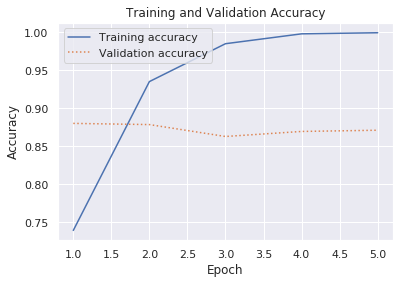

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc'] #loss
val = hist.history['val_acc'] #val_loss
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.12%


In [0]:
import string 
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [0]:
analyze('Easily the most amazing experience I have ever had.')

0.980167

In [0]:
analyze('The long lines and poor customer service really turned me off.')

0.19864716